In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [22]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Data_Activity_Projection.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Total_Skills,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,3,10,1
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,3,8,0
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,3,14,1
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,3,10,1
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,7,0


In [23]:
df1 = df0.drop(columns=["Sum_Skills_Off_ab_avg", "Total_Skills"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off
0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,10
1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,8
2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,14
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,10
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,7


In [24]:
print(df1.sum(axis=0))


Agriculture        101
Animal Care        105
Art                111
Beauty             112
Dance              141
Music              108
Writing            111
Language           115
Health             113
Sports             140
Food               124
Technology         118
Photo              124
Video              121
Sum_Skills_Off    7709
dtype: int64


In [25]:
df1.shape

(800, 15)

# 1. KNN regressor model

## 1.1 Model training

In [26]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]
knn = KNeighborsRegressor(n_neighbors= 10)
y_pred = cross_val_predict(knn, X, y, cv =5)

In [27]:
y_pred

array([[ 8. ],
       [11.1],
       [10.9],
       [10.5],
       [11.4],
       [10.8],
       [ 9.7],
       [ 7.7],
       [11.4],
       [10.8],
       [11.7],
       [10.7],
       [10.4],
       [ 8.2],
       [11.2],
       [ 9.3],
       [ 8.4],
       [10.5],
       [11.4],
       [10.2],
       [10.1],
       [ 8.2],
       [10.8],
       [10. ],
       [10. ],
       [ 8.3],
       [10.5],
       [10.1],
       [ 7.7],
       [11.2],
       [ 9.5],
       [10.1],
       [10.1],
       [11.4],
       [11.5],
       [10.4],
       [10.7],
       [10.9],
       [ 9.4],
       [11.2],
       [11.2],
       [11.6],
       [ 9.6],
       [ 9.5],
       [ 8.1],
       [11.3],
       [ 8.9],
       [10.3],
       [12.5],
       [11.9],
       [10.5],
       [ 9.1],
       [ 8. ],
       [10.4],
       [ 9.1],
       [10.8],
       [10. ],
       [10.3],
       [10.1],
       [ 8.7],
       [ 6.5],
       [ 9. ],
       [10.1],
       [ 9.3],
       [ 9.4],
       [ 6.5],
       [10

In [28]:
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y,y_pred))

17.7245375
4.210051959299315
-0.11500071900943976


In [29]:
error = []
for k in range (1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X,y, cv=5)
    error.append(mean_squared_error(y,y_pred))

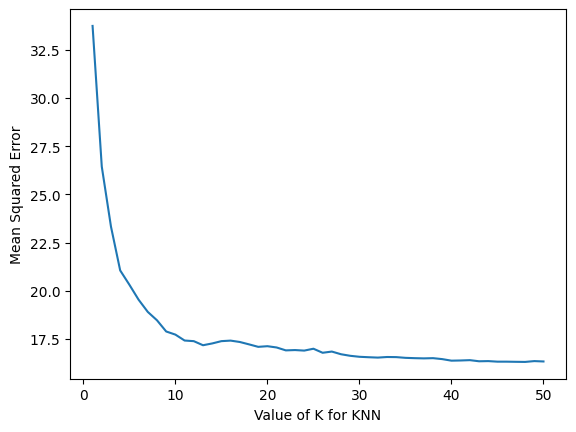

In [30]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,51),error)

## 1.2 Scaling

In [31]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [32]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=5)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

18.0533875
4.248927805929397
-0.13568774604448985


In [33]:
error_scaled = []
for k in range (1,100):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
    error_scaled.append(mean_squared_error(y,y_pred))

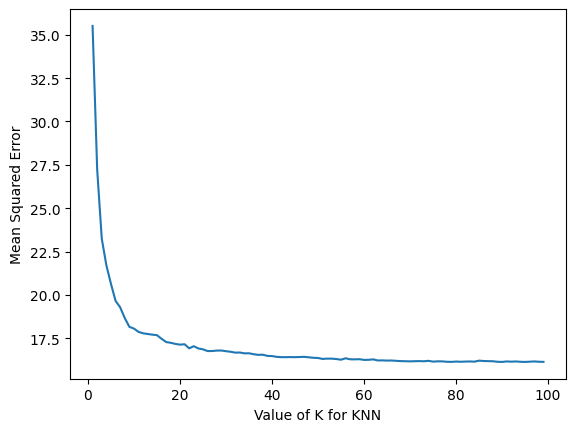

In [34]:
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.plot(range(1,100),error_scaled)

## 1.3 Cross validation / Hyperparameter tuning

In [35]:
cv = KFold(n_splits=5, random_state= None, shuffle=False) 

In [36]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))


18.0533875
4.248927805929397
-0.13568774604448985


In [43]:
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=512))
y_pred = cross_val_predict(classifier_pipeline, X,y, cv=5)
print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))


16.007943034172058
4.000992756075929
-0.007014597304104475


## 1.4 Train model with a smaller K value than 512 (lowest MSE) to generate different predictions for different skill portfolios. This is only for demonstration purposes - because a K value of 512 would produce the same prediction for every skill sets as it predicts the mean of all instances 

In [44]:
final_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=12))
y_pred = cross_val_predict(final_model, X, y, cv=5)
final_model.fit(X, y)

print(mean_squared_error(y,y_pred))
print(sqrt(mean_squared_error(y,y_pred)))
print(r2_score(y, y_pred))

17.781770833333333
4.21684370511089
-0.118601106766693


# 2. Prepare model for API 

In [45]:
import pickle

In [46]:
with open('Activity_Projection_Model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
